<a href="https://colab.research.google.com/github/pizzio98/LogInterpretation/blob/main/LogAnalysisPetrophysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Log Analysis Tool (HW3 Petrophysics)

In [1]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
from matplotlib.ticker import ScalarFormatter

%matplotlib inline

In [2]:
# Load the data to the model
df=pd.read_excel("PGE381L_HW_03_Question1_data.xlsx")
df

,Depth (Ft),AT10 (OHMM),AT20 (OHMM),AT30 (OHMM),AT60 (OHMM),AT90 (OHMM),GR (GAPI),HCAL (IN),NPHI-SS (v/v),NPHI-LS (v/v),PEFZ (B/E),RHOZ (G/CM3),Unnamed: 12,Unnamed: 13
0,5767.0,10.44415,7.81865,6.87851,6.37051,5.83867,97.17116,7.86807,0.134131,0.091293,3.00122,2.53759,NaN,
1,5767.5,10.02669,7.45335,6.55782,6.06871,5.59747,96.54652,7.87203,0.134131,0.091742,2.99301,2.53105,NaN,NaN
2,5768.0,10.11977,7.41233,6.46851,5.97753,5.53381,94.72581,7.86346,0.134131,0.091760,2.96596,2.52598,NaN,NaN
3,5768.5,10.66512,7.66746,6.65587,6.10768,5.65961,92.52570,7.86202,0.143115,0.098543,2.90048,2.53805,NaN,NaN
4,5769.0,10.99216,7.74201,6.77958,6.05281,5.62516,91.70317,7.86202,0.140869,0.097117,2.84752,2.55545,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,6023.0,1027.55800,976.18030,673.27940,417.48600,241.90660,10.49291,7.19951,0.042041,0.010027,-9999.00000,-9999.00000,NaN,NaN
513,6023.5,1029.26300,977.79970,672.80750,416.59320,241.51730,10.49291,7.19951,0.042041,0.010027,-9999.00000,-9999.00000,NaN,NaN
514,6024.0,1034.91700,983.17100,672.51700,416.00830,241.23540,10.49291,7.19951,0.042041,0.010027,-9999.00000,-9999.00000,NaN,NaN
515,6024.5,1041.40700,989.33690,671.69910,414.93120,240.80040,10.49291,7.19951,0.042041,0.010027,-9999.00000,-9999.00000,NaN,NaN


In [3]:
# Count for missing values
df.isnull().sum()

Depth (Ft)         0
AT10 (OHMM)        0
AT20 (OHMM)        0
AT30 (OHMM)        0
AT60 (OHMM)        0
AT90 (OHMM)        0
GR (GAPI)          0
HCAL (IN)          0
NPHI-SS (v/v)      0
NPHI-LS (v/v)      0
PEFZ (B/E)         0
RHOZ (G/CM3)       0
Unnamed: 12      517
Unnamed: 13      516
dtype: int64

In [4]:
#Lets drop the las two columns
df = df.iloc[: , :-2]
df

,Depth (Ft),AT10 (OHMM),AT20 (OHMM),AT30 (OHMM),AT60 (OHMM),AT90 (OHMM),GR (GAPI),HCAL (IN),NPHI-SS (v/v),NPHI-LS (v/v),PEFZ (B/E),RHOZ (G/CM3)
0,5767.0,10.44415,7.81865,6.87851,6.37051,5.83867,97.17116,7.86807,0.134131,0.091293,3.00122,2.53759
1,5767.5,10.02669,7.45335,6.55782,6.06871,5.59747,96.54652,7.87203,0.134131,0.091742,2.99301,2.53105
2,5768.0,10.11977,7.41233,6.46851,5.97753,5.53381,94.72581,7.86346,0.134131,0.091760,2.96596,2.52598
3,5768.5,10.66512,7.66746,6.65587,6.10768,5.65961,92.52570,7.86202,0.143115,0.098543,2.90048,2.53805
4,5769.0,10.99216,7.74201,6.77958,6.05281,5.62516,91.70317,7.86202,0.140869,0.097117,2.84752,2.55545
...,...,...,...,...,...,...,...,...,...,...,...,...
512,6023.0,1027.55800,976.18030,673.27940,417.48600,241.90660,10.49291,7.19951,0.042041,0.010027,-9999.00000,-9999.00000
513,6023.5,1029.26300,977.79970,672.80750,416.59320,241.51730,10.49291,7.19951,0.042041,0.010027,-9999.00000,-9999.00000
514,6024.0,1034.91700,983.17100,672.51700,416.00830,241.23540,10.49291,7.19951,0.042041,0.010027,-9999.00000,-9999.00000
515,6024.5,1041.40700,989.33690,671.69910,414.93120,240.80040,10.49291,7.19951,0.042041,0.010027,-9999.00000,-9999.00000


In [5]:
# Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Depth (Ft),517.0,5896.000000,74.694656,5767.000000,5831.500000,5896.000000,5960.500000,6025.000000
AT10 (OHMM),517.0,306.424879,609.292798,4.288160,7.326310,27.073020,69.303960,1950.000000
AT20 (OHMM),517.0,298.228461,603.724342,2.365730,6.557400,20.055820,53.143030,1950.000000
AT30 (OHMM),517.0,174.378274,402.271914,2.022970,6.382780,15.829650,48.164480,1950.000000
AT60 (OHMM),517.0,121.347131,316.421663,1.701280,6.033670,13.088360,44.660760,1950.000000
AT90 (OHMM),517.0,85.352654,232.509293,1.626600,5.646220,11.968370,43.066370,1950.000000
GR (GAPI),517.0,42.410367,30.643995,10.492910,20.184150,29.203910,63.490360,119.474600
HCAL (IN),517.0,7.703137,0.278755,7.199510,7.576450,7.667100,7.832820,8.744780
NPHI-SS (v/v),517.0,0.138888,0.075370,0.039795,0.077979,0.131885,0.170068,0.343018
NPHI-LS (v/v),517.0,0.097671,0.070623,0.008028,0.040248,0.089879,0.123958,0.295233


In [6]:
# Drop the values where the data is equal to -9999
df = df[df['RHOZ (G/CM3)'] != -9999]
df = df[df['PEFZ (B/E)'] != -9999]
df = df[df['Depth (Ft)']<=5950]
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Depth (Ft),367.0,5858.500000,53.044007,5767.000000,5812.750000,5858.500000,5904.250000,5950.000000
AT10 (OHMM),367.0,49.281318,218.109134,4.288160,6.126145,11.967480,37.632625,1950.000000
AT20 (OHMM),367.0,43.412367,220.122076,2.365730,6.140010,9.420270,24.392465,1950.000000
AT30 (OHMM),367.0,41.210568,223.068430,2.022970,5.939420,8.240730,19.936285,1950.000000
AT60 (OHMM),367.0,42.383182,235.528074,1.701280,5.687430,7.449930,17.461665,1950.000000
AT90 (OHMM),367.0,34.807593,186.861391,1.626600,5.325860,6.921440,16.159885,1950.000000
GR (GAPI),367.0,50.596103,32.025297,14.962090,22.412030,34.791810,81.634550,119.474600
HCAL (IN),367.0,7.799468,0.246912,7.393690,7.629020,7.776820,7.863280,8.744780
NPHI-SS (v/v),367.0,0.163954,0.065552,0.039795,0.125146,0.138623,0.194775,0.343018
NPHI-LS (v/v),367.0,0.120416,0.062868,0.008106,0.082087,0.096249,0.149055,0.295233


In [7]:
# Define functions
def csh (gamma_ray_column):

  csh = (gamma_ray_column-min(gamma_ray_column))/(max(gamma_ray_column)-min(gamma_ray_column))

  return csh 




In [13]:
# Create new table with new values and properties
df['Shale concentration']=csh(df['GR (GAPI)'])
df.loc[df['PEFZ (B/E)']<=2.7, 'Density Porosity'] = (df['RHOZ (G/CM3)']-2.65)/(1-2.65)
df.loc[(df['PEFZ (B/E)']>2.7) & (df['PEFZ (B/E)']<=4) , 'Density Porosity'] = (df['RHOZ (G/CM3)']-2.73)/(1-2.73)
df.loc[(df['PEFZ (B/E)']>4) , 'Density Porosity'] = (df['RHOZ (G/CM3)']-2.71)/(1-2.71)
df.loc[df['Shale concentration']<0.65, 'Corrected Density Porosity'] = (df['Density Porosity']-df['Shale concentration']*0.10)/(1-df['Shale concentration'])
df.loc[df['Shale concentration']>=0.65, 'Corrected Density Porosity'] = df['Density Porosity']
df.loc[df['Shale concentration']<0.65, 'Water Saturation'] = np.sqrt(0.03/(df['AT90 (OHMM)']*df['Density Porosity']**2))
df.loc[df['Shale concentration']>=0.65, 'Water Saturation'] = 1
df['Hydrocarbon Saturation']=1-df['Water Saturation']

df.loc[df['Hydrocarbon Saturation']!=0, 'Filtrate Saturation'] = np.sqrt(0.1422/(df['AT10 (OHMM)']*df['Density Porosity']**2))
df.loc[df['Hydrocarbon Saturation']==0, 'Filtrate Saturation'] = 1
df['Movable Hydrocarbon Saturation']=df['Filtrate Saturation']-df['Water Saturation']
df

,Depth (Ft),AT10 (OHMM),AT20 (OHMM),AT30 (OHMM),AT60 (OHMM),AT90 (OHMM),GR (GAPI),HCAL (IN),NPHI-SS (v/v),NPHI-LS (v/v),PEFZ (B/E),RHOZ (G/CM3),Shale concentration,Density Porosity,Corrected Density Porosity,Water Saturation,Hydrocarbon Saturation,Filtrate Saturation,Movable Hydrocarbon Saturation,Hydrocarbon Reserve in place
0,5767.0,10.44415,7.81865,6.87851,6.37051,5.83867,97.17116,7.86807,0.134131,0.091293,3.00122,2.53759,0.786595,0.111220,0.111220,1.000000,0.000000,1.000000,0.000000,0.000000
1,5767.5,10.02669,7.45335,6.55782,6.06871,5.59747,96.54652,7.87203,0.134131,0.091742,2.99301,2.53105,0.780619,0.115000,0.115000,1.000000,0.000000,1.000000,0.000000,0.000000
2,5768.0,10.11977,7.41233,6.46851,5.97753,5.53381,94.72581,7.86346,0.134131,0.091760,2.96596,2.52598,0.763198,0.117931,0.117931,1.000000,0.000000,1.000000,0.000000,0.000000
3,5768.5,10.66512,7.66746,6.65587,6.10768,5.65961,92.52570,7.86202,0.143115,0.098543,2.90048,2.53805,0.742147,0.110954,0.110954,1.000000,0.000000,1.000000,0.000000,0.000000
4,5769.0,10.99216,7.74201,6.77958,6.05281,5.62516,91.70317,7.86202,0.140869,0.097117,2.84752,2.55545,0.734276,0.100896,0.100896,1.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,5948.0,1541.53000,1618.60600,1699.53700,1950.00000,1950.00000,19.40432,7.55391,0.042041,0.009687,4.73507,2.67536,0.042504,0.020257,0.016717,0.193625,0.806375,0.474124,0.280499,0.008167
363,5948.5,1950.00000,1950.00000,1950.00000,1950.00000,1783.26900,19.38700,7.69165,0.039795,0.008348,4.76906,2.67491,0.042339,0.020520,0.017007,0.199878,0.800122,0.416146,0.216268,0.008209
364,5949.0,1950.00000,1950.00000,1950.00000,1859.83000,1342.85200,22.60279,7.69374,0.039795,0.008106,4.74079,2.68703,0.073108,0.013433,0.006605,0.351870,0.648130,0.635723,0.283853,0.004353
365,5949.5,1950.00000,1950.00000,1950.00000,1950.00000,1337.26300,24.74994,7.63890,0.039795,0.008893,4.70159,2.69751,0.093652,0.007304,-0.002274,0.648464,0.351536,1.169139,0.520675,0.001284


In [ ]:
df.to_excel('Fast track.xlsx')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde19346690>,
      dtype=object)

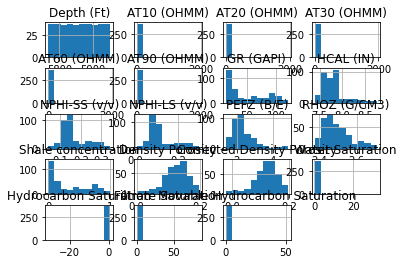

In [ ]:
df.hist()

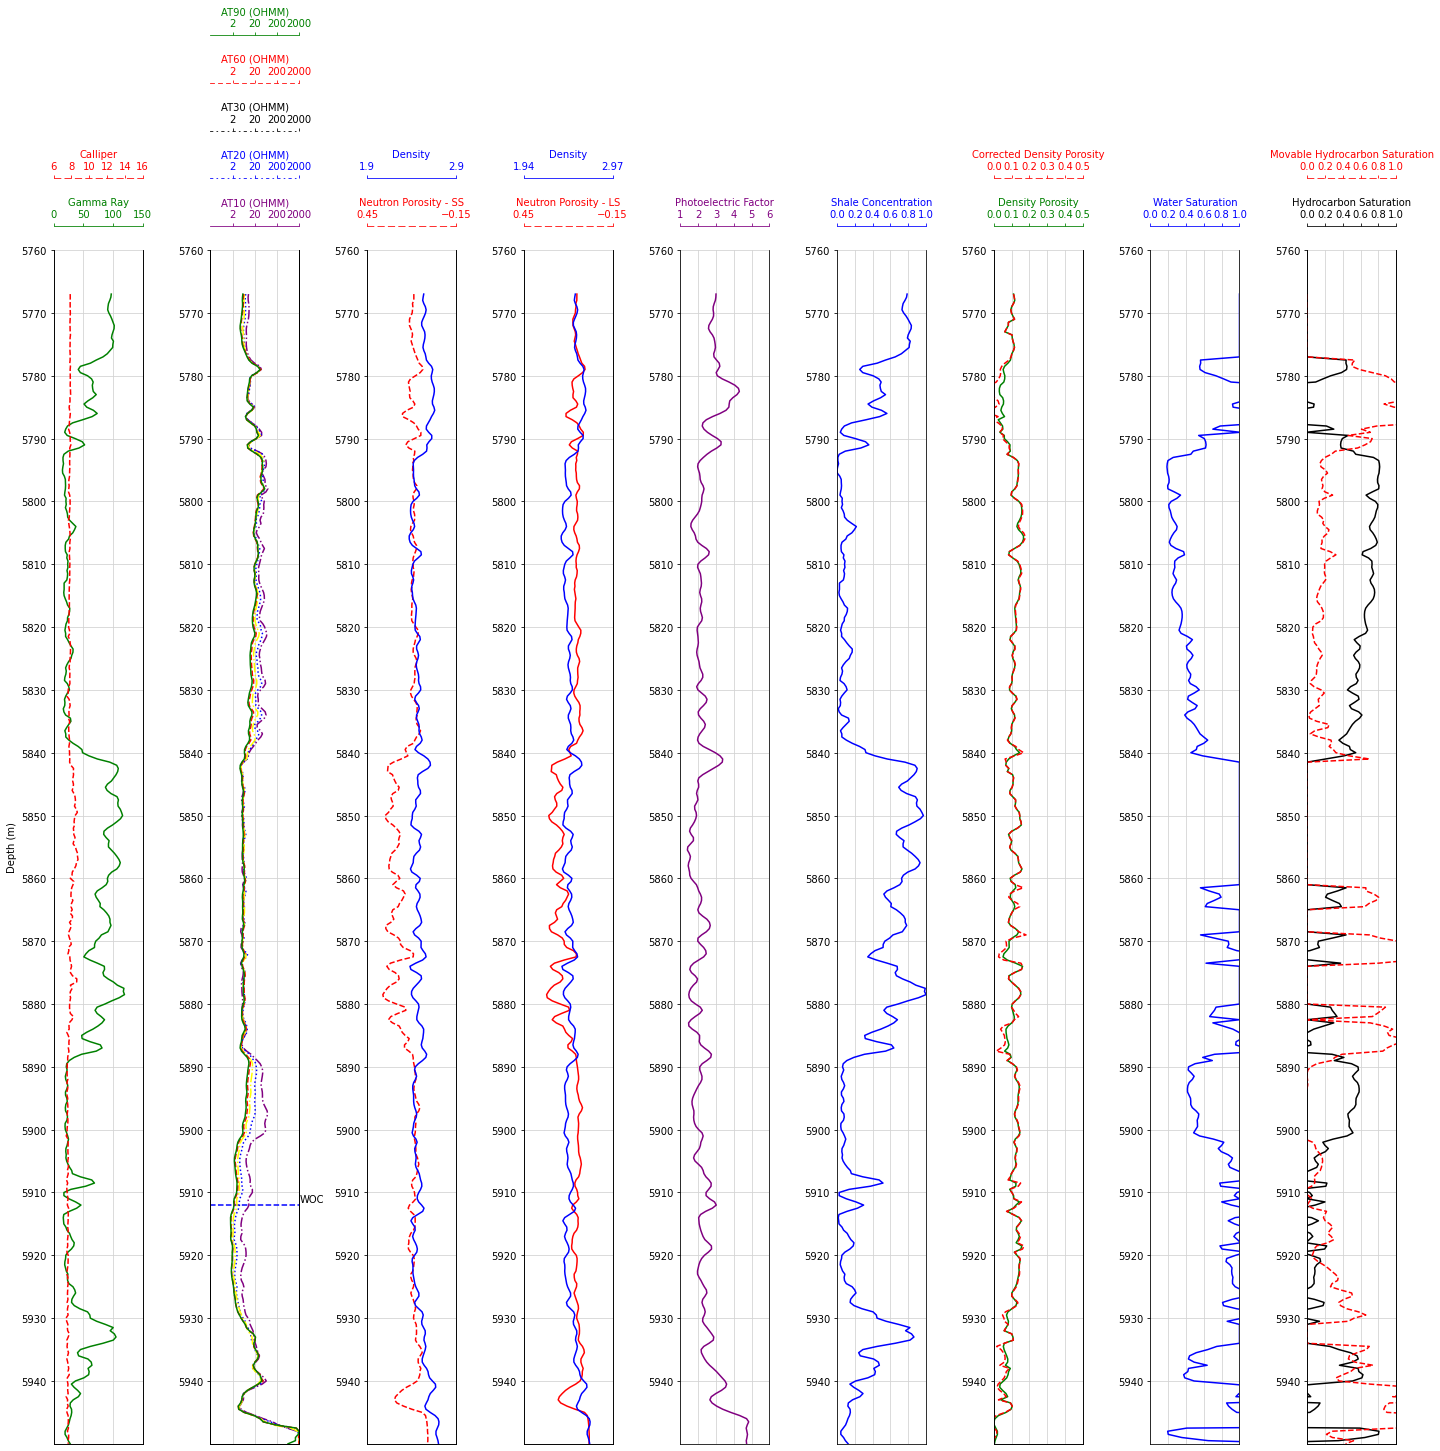

In [14]:
# Plot the logs (extracted from Andy McDonald Github)
fig, ax = plt.subplots(figsize=(20,20))

#Set up the plot axes
ax1 = plt.subplot2grid((1,9), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,9), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,9), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,9), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,9), (0,4), rowspan=1, colspan = 1)
ax13 = plt.subplot2grid((1,9), (0,5), rowspan=1, colspan = 1)
ax14 = plt.subplot2grid((1,9), (0,6), rowspan=1, colspan = 1)
ax16 = plt.subplot2grid((1,9), (0,7), rowspan=1, colspan = 1)
ax17 = plt.subplot2grid((1,9), (0,8), rowspan=1, colspan = 1)
ax6 = ax3.twiny() #Twins the y-axis for the density track with the neutron track
ax7 = ax4.twiny()
ax8 = ax1.twiny()
ax9 = ax2.twiny()
ax10 = ax2.twiny()
ax11 = ax2.twiny()
ax12 = ax2.twiny()
ax15 = ax14.twiny()
ax18 = ax17.twiny()

# Gamma Ray track
ax1.plot(df["GR (GAPI)"], df["Depth (Ft)"], color = "green",)
ax1.set_xlabel("Gamma Ray")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150])

# Calliper track 
ax8.plot(df["HCAL (IN)"], df["Depth (Ft)"], color = "red",linestyle='--')
ax8.set_xlabel("Calliper")
ax8.xaxis.label.set_color("red")
ax8.set_xlim(6, 16)
ax8.set_ylabel("Depth (m)")
ax8.tick_params(axis='x', colors="red")
ax8.spines["top"].set_position(("axes", 1.06))
ax8.spines["top"].set_edgecolor("red")
ax8.spines["top"].set_linestyle((0,(8,5)))
ax8.set_xticks([6,8,10,12,14,16])

# Resistivity track
ax2.plot(df['AT10 (OHMM)'],df['Depth (Ft)'],color='purple',linestyle='dashdot')
ax9.plot(df['AT20 (OHMM)'],df['Depth (Ft)'],color='blue',linestyle='dotted')
ax10.plot(df['AT30 (OHMM)'],df['Depth (Ft)'],color='yellow',linestyle='dashdot')
ax11.plot(df['AT60 (OHMM)'],df['Depth (Ft)'],color='red',linestyle='dashed')
ax12.plot(df['AT90 (OHMM)'],df['Depth (Ft)'],color='green')

ax2.set_xlabel('AT10 (OHMM)')
ax2.xaxis.label.set_color("purple")
ax2.tick_params(axis='x', colors="purple")
ax2.spines["top"].set_edgecolor("purple")
ax9.spines["top"].set_linestyle((0, (1, 1)))
ax2.title.set_color('purple')


ax9.set_xlabel('AT20 (OHMM)')
ax9.xaxis.label.set_color("blue")
ax9.tick_params(axis='x', colors="blue")
ax9.spines["top"].set_position(("axes", 1.06))
ax9.spines["top"].set_edgecolor("blue")
ax9.spines["top"].set_linestyle((0, (3, 5, 1, 5)))
ax9.title.set_color('blue')
ax9.set_xlim(0.2,2000)

ax10.set_xlabel('AT30 (OHMM)')
ax10.xaxis.label.set_color("black")
ax10.tick_params(axis='x', colors="black")
ax10.spines["top"].set_position(("axes", 1.10))
ax10.spines["top"].set_edgecolor("black")
ax10.spines["top"].set_linestyle((0, (3, 5, 1, 5)))
ax10.title.set_color('black')
ax10.set_xlim(0.2,2000)

ax11.set_xlabel('AT60 (OHMM)')
ax11.xaxis.label.set_color("red")
ax11.tick_params(axis='x', colors="red")
ax11.spines["top"].set_position(("axes", 1.14))
ax11.spines["top"].set_edgecolor("red")
ax11.spines["top"].set_linestyle((0, (5, 5)))
ax11.title.set_color('red')
ax11.set_xlim(0.2,2000)

ax12.set_xlabel('AT90 (OHMM)')
ax12.xaxis.label.set_color("green")
ax12.tick_params(axis='x', colors="green")
ax12.spines["top"].set_position(("axes", 1.18))
ax12.spines["top"].set_edgecolor("green")
ax12.title.set_color('green')
ax12.set_xlim(0.2,2000)

ax2.set_xscale('log')
ax2.set_xticks([2,20,200,2000])
ax2.get_xaxis().set_major_formatter(ScalarFormatter())
ax9.set_xscale('log')
ax9.set_xticks([2,20,200,2000])
ax9.get_xaxis().set_major_formatter(ScalarFormatter())
ax10.set_xscale('log')
ax10.set_xticks([2,20,200,2000])
ax10.get_xaxis().set_major_formatter(ScalarFormatter())
ax11.set_xscale('log')
ax11.set_xticks([2,20,200,2000])
ax11.get_xaxis().set_major_formatter(ScalarFormatter())
ax12.set_xscale('log')
ax12.set_xticks([2,20,200,2000])
ax12.get_xaxis().set_major_formatter(ScalarFormatter())

ax2.set_xlim(0.2,2000)
ax2.grid(which='both', color='lightgrey', linestyle='-')

# Neutron Sandstone  track
ax3.plot(df["NPHI-SS (v/v)"], df["Depth (Ft)"], color = "red",linestyle='--')
ax3.set_xlabel("Neutron Porosity - SS")
ax3.set_xlim(0.45, -0.15)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.spines["top"].set_linestyle((0,(8,5)))
ax3.set_xticks([0.45, -0.15])

# Neutron Limestone track
ax4.plot(df["NPHI-LS (v/v)"], df["Depth (Ft)"], color = "red")
ax4.set_xlabel("Neutron Porosity - LS")
ax4.set_xlim(0.45, -0.15)
ax4.xaxis.label.set_color("red")
ax4.tick_params(axis='x', colors="red")
ax4.spines["top"].set_edgecolor("red")
ax4.spines["top"].set_linestyle((0,(8,5)))
ax4.set_xticks([0.45, -0.15])

# Photoelectric track
ax5.plot(df['PEFZ (B/E)'], df["Depth (Ft)"], color = "purple")
ax5.set_xlabel("Photoelectric Factor")
ax5.set_xlim(1, 6)
ax5.xaxis.label.set_color("purple")
ax5.tick_params(axis='x', colors="purple")
ax5.spines["top"].set_edgecolor("purple")
ax5.set_xticks([1, 2, 3, 4, 5, 6])

# Density track placed ontop of neutron track
ax6.plot(df["RHOZ (G/CM3)"], df["Depth (Ft)"], color = "blue")
ax6.set_xlabel('Density')
ax6.xaxis.label.set_color("blue")
ax6.set_xlim(1.9, 2.9)
ax6.tick_params(axis='x', colors="blue")
ax6.spines["top"].set_position(("axes", 1.06))
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("blue")
ax6.set_xticks([1.9,2.9])

ax7.plot(df["RHOZ (G/CM3)"], df["Depth (Ft)"], color = "blue")
ax7.set_xlabel('Density')
ax7.xaxis.label.set_color("blue")
ax7.set_xlim(1.94, 2.97)
ax7.tick_params(axis='x', colors="blue")
ax7.spines["top"].set_position(("axes", 1.06))
ax7.spines["top"].set_visible(True)
ax7.spines["top"].set_edgecolor("blue")
ax7.set_xticks([1.94,2.97])

# Shale Concentration
ax13.plot(df['Shale concentration'], df["Depth (Ft)"], color = "blue")
ax13.set_xlabel("Shale Concentration")
ax13.set_xlim(0, 1)
ax13.xaxis.label.set_color("blue")
ax13.tick_params(axis='x', colors="blue")
ax13.spines["top"].set_edgecolor("blue")
ax13.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

# Density Porosity 
ax14.plot(df['Density Porosity'], df["Depth (Ft)"], color = "green")
ax14.set_xlabel("Density Porosity")
ax14.set_xlim(0, 0.5)
ax14.xaxis.label.set_color("green")
ax14.tick_params(axis='x', colors="green")
ax14.spines["top"].set_edgecolor("green")
ax14.set_xticks([0, 0.1, 0.2,0.3,0.4,0.5])

# Density Porosity Corrected
ax15.plot(df['Corrected Density Porosity'], df["Depth (Ft)"], color = "red",linestyle='--')
ax15.set_xlabel("Corrected Density Porosity")
ax15.xaxis.label.set_color("red")
ax15.set_xlim(0, 0.5)
ax15.set_ylabel("Depth (m)")
ax15.tick_params(axis='x', colors="red")
ax15.spines["top"].set_position(("axes", 1.06))
ax15.spines["top"].set_edgecolor("red")
ax15.spines['top'].set_linestyle((0,(8,5)))
ax15.title.set_color('red')
ax15.set_xticks([0, 0.1, 0.2,0.3,0.4,0.5])

# Water Saturation
ax16.plot(df['Water Saturation'], df["Depth (Ft)"], color = "blue")
ax16.set_xlabel("Water Saturation")
ax16.set_xlim(0, 1)
ax16.xaxis.label.set_color("blue")
ax16.tick_params(axis='x', colors="blue")
ax16.spines["top"].set_edgecolor("blue")
ax16.set_xticks([0, 0.2, 0.4,0.6,0.8,1])

# Hydrocarbon Saturation 
ax17.plot(df['Hydrocarbon Saturation'], df["Depth (Ft)"], color = "black")
ax17.set_xlabel("Hydrocarbon Saturation")
ax17.set_xlim(0, 1)
ax17.xaxis.label.set_color("black")
ax17.tick_params(axis='x', colors="black")
ax17.spines["top"].set_edgecolor("black")
ax17.set_xticks([0, 0.2, 0.4,0.6,0.8,1])

#Movable Hydrocarbon Saturation
ax18.plot(df['Movable Hydrocarbon Saturation'], df["Depth (Ft)"], color = "red",linestyle='--')
ax18.set_xlabel("Movable Hydrocarbon Saturation")
ax18.xaxis.label.set_color("red")
ax18.set_xlim(0, 1)
ax18.set_ylabel("Depth (m)")
ax18.tick_params(axis='x', colors="red")
ax18.spines["top"].set_position(("axes", 1.06))
ax18.spines["top"].set_edgecolor("red")
ax18.spines["top"].set_linestyle((0,(8,5)))
ax18.title.set_color('red')
ax18.set_xticks([0, 0.2, 0.4,0.6,0.8,1])

# Common functions for setting up the plot can be extracted into
# a for loop. This saves repeating code.
for ax in [ax1,ax2,ax3,ax4,ax5,ax13,ax14,ax16,ax17]:
    ax.set_ylim(5950, 5760)
    ax.set_yticks(np.arange(5760,5950,10))
    ax.grid(which='both', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

ax2.hlines(5912, 0.2, 2000, color='blue',linestyles='dashed')
ax2.text(1999,5911.5,'WOC')
plt.tight_layout()

In [15]:
# We are now going to estimate the NHC
df['Hydrocarbon Reserve in place']=0.5*df['Density Porosity']*df['Hydrocarbon Saturation']
# Now we are going to separate both zone of interests

# Upper Layer (5791.5 ft – 5839 ft)

Upper_layer=df['Hydrocarbon Reserve in place'].loc[(df['Depth (Ft)'] >= 5791.5) & (df['Depth (Ft)'] <=5839)]
NHC_upper=7758*Upper_layer.sum()

# Lower Layer (5888,5 ft – 5912 ft)
Lower_layer=df['Hydrocarbon Reserve in place'].loc[(df['Depth (Ft)'] >= 5888.5) & (df['Depth (Ft)'] <=5912)]
NHC_lower=7758*Lower_layer.sum()

NHC_upper , NHC_lower

(30175.47866035398, 7725.1392271874)

In [16]:
NHC_total = NHC_upper + NHC_lower
NHC_total

37900.61788754138

In [ ]:
fig.savefig('FinalLogInterpretation.pdf',bbox_inches = 'tight')

In [18]:
fig.savefig('FinalLogInterpretationv1.png',bbox_inches = 'tight')